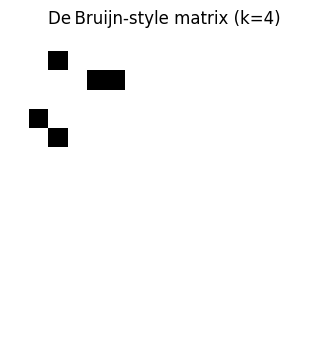

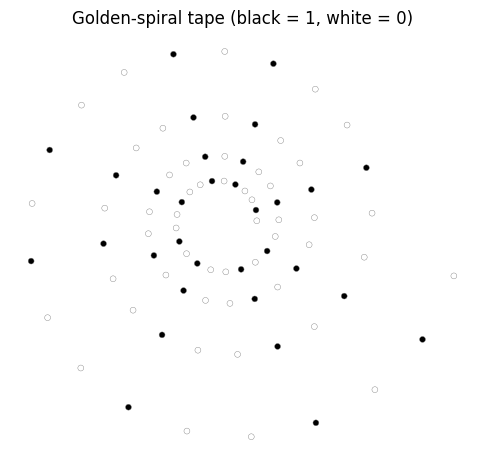

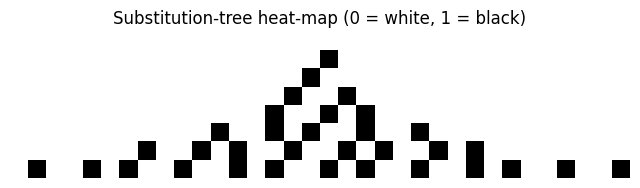

✓ Figures saved as debruijn_k4.png, spiral.png, sub_tree.png


In [1]:
# ==========================================================
#  Visualising the Fibonacci ("golden‑bit") binary word
#  ------------------------------------------------------
#  • De Bruijn‑style k‑bit window matrix
#  • Golden‑spiral radial tape
#  • Substitution‑tree heat‑map
#
#  Paste this entire script into a Colab cell and run ⇧⏎.
#  It needs only numpy & matplotlib (pre‑installed).  Figures
#  are saved as PNGs in the session and also auto‑displayed.
# ==========================================================

import math, numpy as np, matplotlib.pyplot as plt

# ----------------------------------------------------------
#  Helper: first N bits of the Fibonacci word
# ----------------------------------------------------------

def fib_bits(n: int) -> str:
    a, b = '0', '01'  # morphism images
    w = '0'
    while len(w) < n:
        w = ''.join(b if ch == '0' else a for ch in w)
    return w[:n]

# ----------------------------------------------------------
#  1) De Bruijn‑like sliding‑window matrix
# ----------------------------------------------------------

def debruijn_plot(k: int = 4, bits_len: int = 400, save: str | None = None):
    """Plot a k‑bit window incidence matrix."""
    bits = fib_bits(bits_len)
    size = 2 ** k
    mask = np.zeros((size, size))
    for i in range(len(bits) - k + 1):
        chunk = bits[i : i + k]
        pref = int(chunk[:-1], 2)
        suff = int(chunk[1:], 2)
        mask[pref, suff] = 1
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(mask, cmap="Greys", interpolation="nearest")
    ax.set_title(f"De Bruijn‑style matrix (k={k})")
    ax.axis("off")
    if save:
        fig.savefig(save, bbox_inches="tight", dpi=150)
    plt.show()

# ----------------------------------------------------------
#  2) Golden‑spiral radial tape plot
# ----------------------------------------------------------

def spiral_plot(turns: int = 4, theta_step: float = 0.3, save: str | None = None):
    """Map successive bits onto a logarithmic spiral with growth φ."""
    bit_budget = int(turns * 2 * math.pi / theta_step) + 1
    bits = fib_bits(bit_budget)
    phi = (1 + math.sqrt(5)) / 2

    xs, ys, colors = [], [], []
    theta = 0.0
    for bit in bits:
        r = phi ** (theta / (2 * math.pi))
        xs.append(r * math.cos(theta))
        ys.append(r * math.sin(theta))
        colors.append("black" if bit == "1" else "white")
        theta += theta_step
        if theta > turns * 2 * math.pi:
            break
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(xs, ys, c=colors, s=18, edgecolors="grey", linewidth=0.3)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_title("Golden‑spiral tape (black = 1, white = 0)")
    if save:
        fig.savefig(save, bbox_inches="tight", dpi=150)
    plt.show()

# ----------------------------------------------------------
#  3) Substitution‑tree heat‑map (morphism dynamics)
# ----------------------------------------------------------

def substitution_heatmap(levels: int = 8, save: str | None = None):
    """Visualise how 0→01, 1→0 builds the word generation by generation."""
    rows = []
    current = ["0"]
    for _ in range(levels):
        rows.append(current)
        nxt = []
        for s in current:
            nxt.extend(["0", "1"] if s == "0" else ["0"])
        current = nxt

    max_len = len(rows[-1])
    mat = np.full((levels, max_len), np.nan)
    for i, row in enumerate(rows):
        offset = (max_len - len(row)) // 2  # center the row
        for j, val in enumerate(row):
            mat[i, offset + j] = 0 if val == "0" else 1

    fig, ax = plt.subplots(figsize=(8, levels * 0.6))
    ax.imshow(mat, cmap="binary", interpolation="none")
    ax.axis("off")
    ax.set_title("Substitution‑tree heat‑map (0 = white, 1 = black)")
    if save:
        fig.savefig(save, bbox_inches="tight", dpi=150)
    plt.show()

# ----------------------------------------------------------
#  Convenience wrapper: generate all three in one go
# ----------------------------------------------------------

def main():
    debruijn_plot(save="debruijn_k4.png")
    spiral_plot(save="spiral.png")
    substitution_heatmap(save="sub_tree.png")
    print("✓ Figures saved as debruijn_k4.png, spiral.png, sub_tree.png")

# ----------------------------------------------------------
#  Execute automatically when run in Colab / Python
# ----------------------------------------------------------
if __name__ == "__main__":
    main()
